In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('HR_comma_sep.csv')
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import seaborn as sns

<AxesSubplot:ylabel='Frequency'>

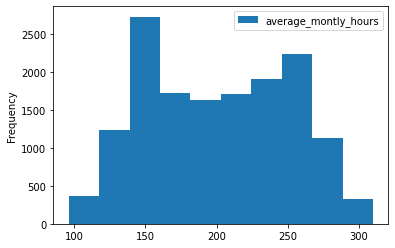

In [8]:
df[['average_montly_hours','salary']].plot(kind="hist")

In [15]:
dummy = pd.get_dummies(df['Department'])
dummy

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [21]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [16]:
marge_df = pd.concat([df, dummy], axis=1)
marge_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
marge_df.salary = le.fit_transform(marge_df.salary)
marge_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0


In [22]:
marge_df.salary.unique()

array([1, 2, 0])

Text(0.5, 1.0, 'df.corr()')

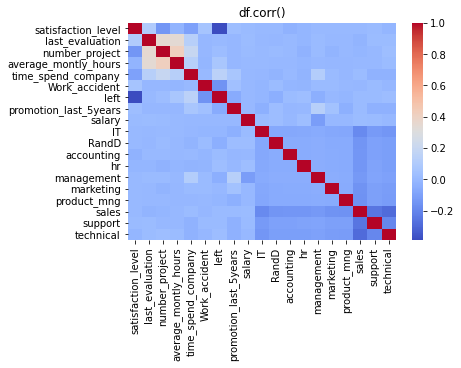

In [23]:
sns.heatmap(marge_df.corr(),cmap='coolwarm')
plt.title('df.corr()')

In [25]:
new_df = marge_df[['last_evaluation', 'number_project','average_montly_hours','time_spend_company']]

In [26]:
new_df.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.53,2,157,3
1,0.86,5,262,6
2,0.88,7,272,4
3,0.87,5,223,5
4,0.52,2,159,3


In [10]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(new_df,marge_df.salary,test_size=0.2)

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\anaconda3\envs\data\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred = model.predict(X_test)
y_pred = pd.Series(y_pred)

In [41]:
y_pred.to_csv('pred.csv', index=False)

In [35]:
y_test

781      1
12556    1
8452     0
2117     1
10382    1
        ..
8409     1
7421     0
8500     2
9556     1
7949     2
Name: salary, Length: 3000, dtype: int32

In [42]:
len(y_pred)

3000

In [43]:
len(y_test)

3000

In [44]:
model.score(X_test,y_test)

0.49333333333333335